<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>

<center><h1>Regression</h1></center>

Of all the techniques in Machine Learning and Predictive Analytics, **_Regression_** is one of the most mature.  Recall that regression is different from the classification problems we have dealt with so far; whereas classification looks at data and tells us what class it belongs to, regression instead seeks to output a continuous value.  Classification and regression are often two sides of the same coin, and which one you use often depends on the phrasing of the question you're trying to answer.  For this exercise, we'll be trying to predict housing prices on the `boston_housing_prices` data set.  Let's look at an some example questions we could ask about this data set.

<h3>Classification</h3>
* Will this house sell for more or less than this price? *
<br>
* Does this house have less than 3 offers on it? *
<br>
* Based on the price and other data about the house, can we predict if this house has 2 bedrooms, or less, or more?*

<h3>Regression</h3>
* How much do we think this house will sell for? *
<br>
* Based on the data, how many offers do we expect this house to receive? *
<br>
* Based on price and other data about the house, can we predict how many bedrooms a house has? *
<br>
<br>
As you can see, these are pretty much the same question, but phrased differently.  Under the hood, classification is often just a regression, with the caveat that values below the threshold are one class while values above the threshold are another.  

<center><img src='img/classification_vs_regression.png' height=40% width=40%></center>

<center><h2>The Basics: Linear Regression</h2></center>

Before we begin coding, we'll briefly explore how it works and how we can interpret a regression.  This lesson will probably feel more math-heavy than other lessons, and will certainly contain more jargon--but don't worry! The math behind linear regression is fairly intuitive (and fairly simple), and regression is great baseline for understanding how more advanced topics in machine learning work, such as Neural Networks. 

<h3>The Idea Behind Regression</h3>

The most basic form of regression is **_Linear Regression_**.  Linear Regression is a **_Linear Modeling_** technique used to predict a variable as a function of another variable. You've probably seen this written out like this before:

<center><h3>y = f(x)</h3></center>

The most common version of this function (and the one we're trying to discover in Linear Regression) is also one you're likely familiar with:

<center><h3>y = mx + b</h3></center>

This is the basic formula for a line on a cartesian plane that you likely learned in grade school.  In linear regression, our goal is to take some data: 
    

<center><img src='img/scatter.png' height=40% width=40%></center>
<br>
<br>
<center>and discover the function for the **_line of best fit._**</center>
<br>
<br>
<center><img src='img/lbf.png' height=60% width=60%></center>

Let's take a look at the line for the equation and interpret what it means.  You'll often see the the equation for the line of best fit represented like this:

<center><img src='img/regression_equation.png' height=40% width=40%></center>

Let's examine what these symbols mean, and see if we can't 

**_α_**: This value is the bias.  Mathematically, we can think of this as where our line crosses the y-axis.  

**_β_**: is the slope, which defines the relationship between x and y.  In layman's terms, we can interpret this value as how much we expect to y to increase whenever we increase the value of x by 1.  

If we were trying to use linear regression to predict something like how much it would cost for a factory to produce \[x\] widgets, then we could use this equation to make a prediction. In this scenario:

β would represent the cost per unit to produce a widget.  How much we have to spend on manufacturing depends on how many we want ot manufacture.  If we want to manufacture 10,000 widgets and they cost us $.80 each, then the value for β would be .8.

α would represent the fixed costs that don't change with the scale of x. In this scenario, these could be fixed operating costs like how much rent we have to pay to occupy the factory.  There's no avoiding this cost, and it doesn't increase or decrease with our scale.  If the rent for our factory is $10,000/month, then we know we'll have to pay $10,000 this month, regardless of whether we make 1 widget or 1 million widgets.  


<center><h3>Fitting a Linear Regression in Python</h3></center>

In the code block below, we'll create a basic data set that contains some correlation between X and Y.  Then, we'll fit a linear regression to it, and display the line of best fit. Feel free to examine the code and try to figure out how it works, but don't worry if you don't understand everything just yet--this is just help us create a quick visualization of a line of best fit against a scatterplot of data.  

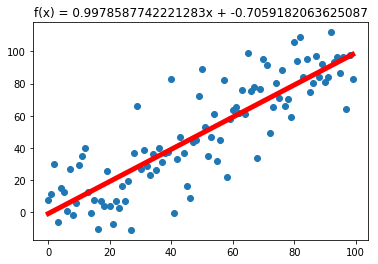

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.random.seed(0)

def generate_dataset(num_samples=100, noise=100):
    '''Generates a random number of samples to act as a dataset for linear regression.'''
    x = []
    y = []
    for i in range(num_samples):
        x.append(i)
        if noise == 0:
            added_noise  = 0
        else:
            upper_noise_limit = noise / 2
            lower_noise_limit = (upper_noise_limit) * -1
            added_noise = np.random.rand() *  np.random.randint(lower_noise_limit, upper_noise_limit)
        y.append(i + added_noise)
    return x, y

def show_best_fit(x, y):
    '''Plots a line of best fit on top of the data points'''
    plt.scatter(x, y)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red', linewidth=5)
    m, b  = np.polyfit(x, y, 1)
    plt.title("f(x) = {}x + {}".format(m, b))
    
x, y = generate_dataset()
show_best_fit(x, y)

<center><h2>Using Mulitple Regression for the Boston Housing Prices Dataset</h2></center>

In the example above, we were able to graph our findings because we only used 1 predictor.  Although we can't graph really graph a regression that uses more than 2 predictors, we can still fit the regression and use it for making predictions.  In this problem set, that's exactly what we'll do.

<center><h3>About the Data Set</h3></center>

The `Boston_Housing_Prices` dataset is a famous dataset usually used for learning or benchmarking regression techniques.  This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as our target. All other variables are continuous, with the exception of 1 being binary (if the house shares a border with the Charles River).  For a full description of each predictor, you can [follow this link](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names), or just examine the `.DESC` attribute of the object `load_boston()` returns.  

<center><h3>Your Task</h3></center>

For this assignment, your task is to:

1. Read in the dataset using sklearn's `load_boston()` function (found in `sklearn.datasets`)
<br>
<br>
2. Perform some basic exploratory data analysis to get a feel for the data.  Graph some stuff!
<br>
<br>
3. Create a **_correlation heatmap_** to check to see how highly correlated our predictor variables are (Remember, if our predictors are highly correlated, this is bad.) . 
<br>
<br>
4. Split the data into training and testing, or use K-Fold Cross Validation.  Your choice.  
<br>
5. Fit a regression model.  Examine the results.  If any of the predictors have a P-value of greater than 0.05, remove that predictor from your dataset and rerun the regression.  Repeat until you have a well-fit regression model. 
<br>
<br>
6. Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.  


<center>**_Step 1: Import the Data_**</center>

In [3]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()


# Create a dataframe object out of the data.  Use boston.data for the data, and pass boston.feature_names 
# for the columns parameter
cols = boston.feature_names

df = pd.DataFrame(boston.data, columns=cols)
display(df.head())
display(df.describe())

# Store the data in boston.target in the targets variable
targets = boston.target
display(len(targets))
df["Target"] = targets
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


506

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<center>**_Step 2: Exploratory Data Analysis_**</center>

Be sure to familiarize yourself with this dataset enough to answer the following questions:

1.  Are there any null values in this dataset?
2.  Are there any outliers in this dataset?
3.  What are the descriptive statistics of each predictor?

If you run across any null values or outliers, deal with them, and make note of your strategy for doing so. 

**_A Note on the Data in this Data Set:_**: If you examine the predictors, you'll likely notice one of the predictors, B, is problematic for a number of reasons.  This predictor is a measure of how much of the neighborhood was occupied by Black residents at the time.  This is not a majorly predictive attribute, but even if it was, it it brings up questions about whether we _should_ use data on things such as race, gender, etc in our models.  We have chosen to leave this attribute in the dataset because this is what the actual dataset contains, but with the caveat that we will be using this to have a larger discussion about data ethics in class.  

In [4]:
display(boston["DESCR"])

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Target,Outlier
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  'left=%s, right=%s') % (left, right))


LinAlgError: singular matrix

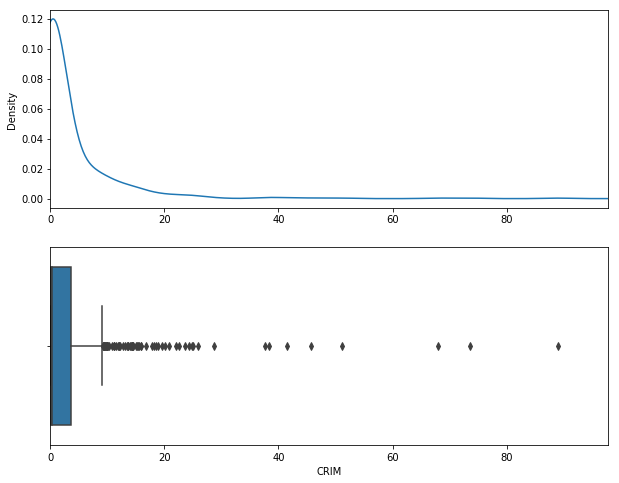

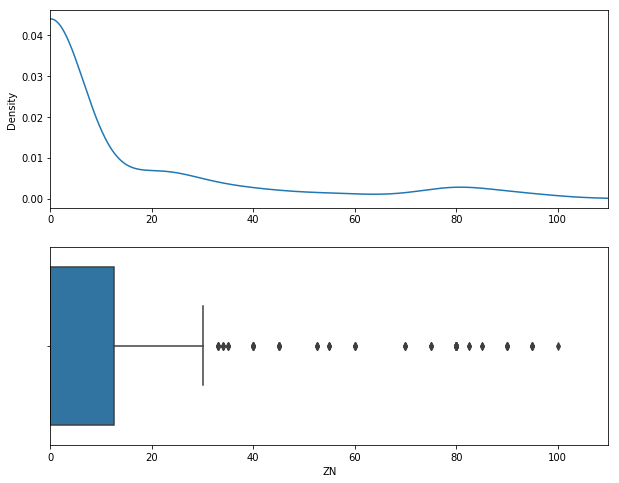

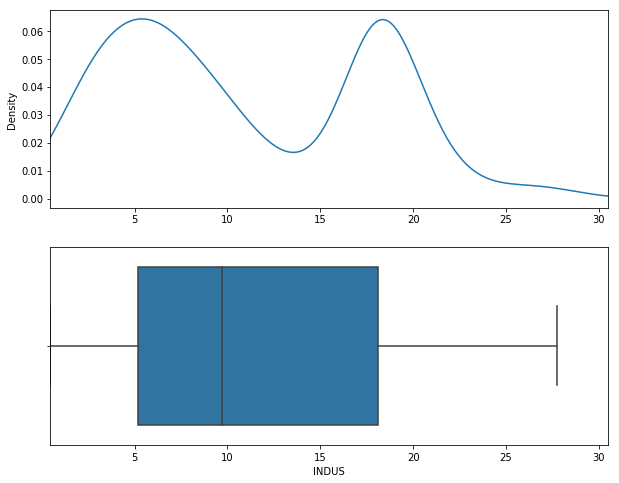

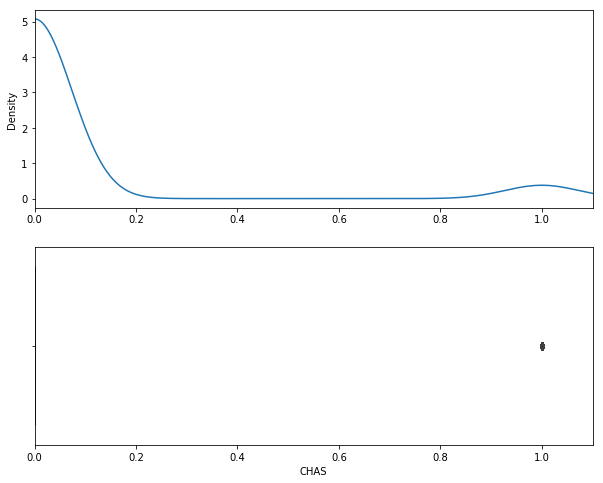

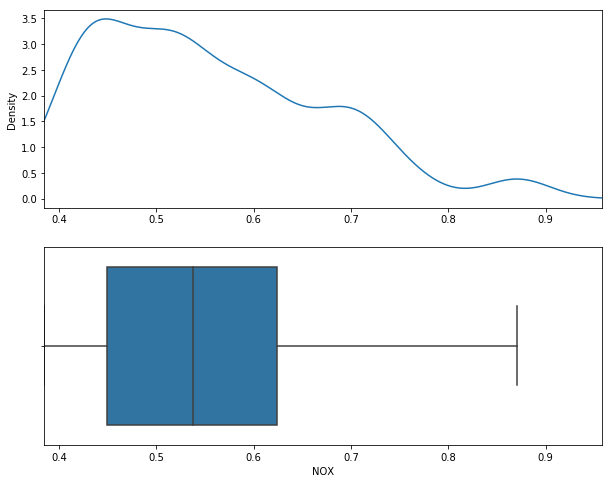

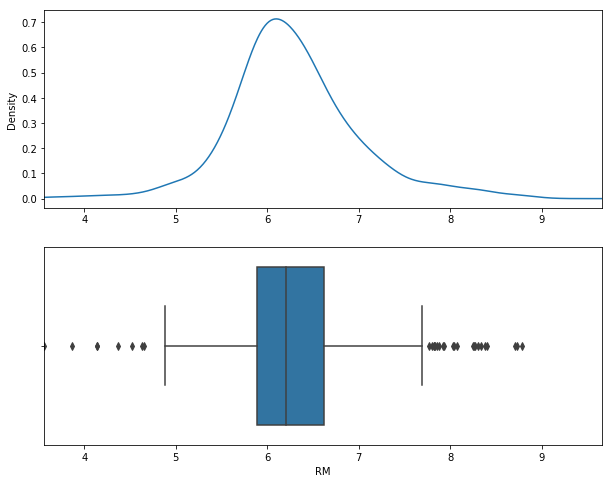

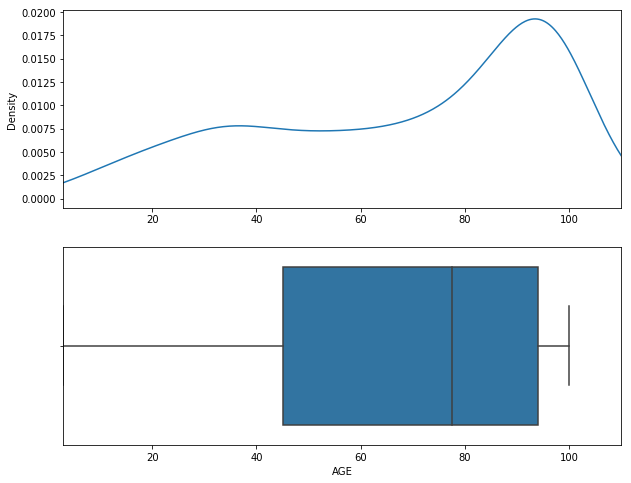

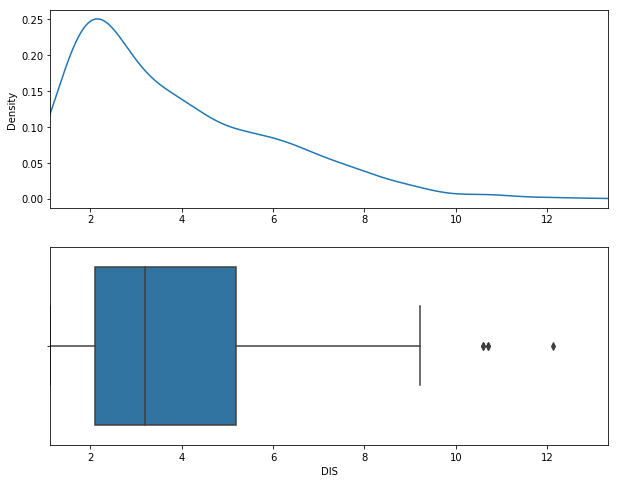

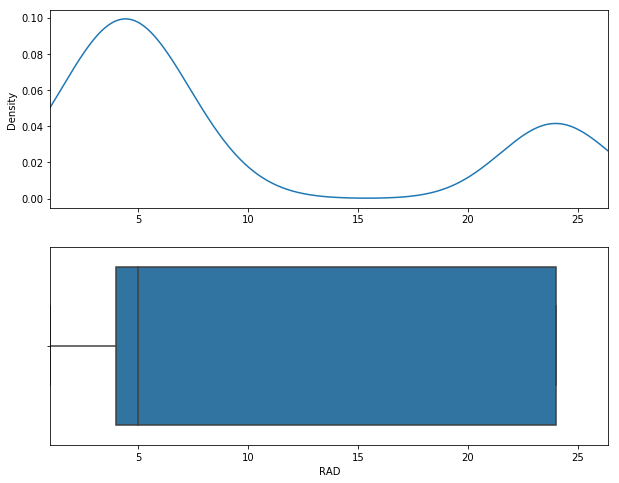

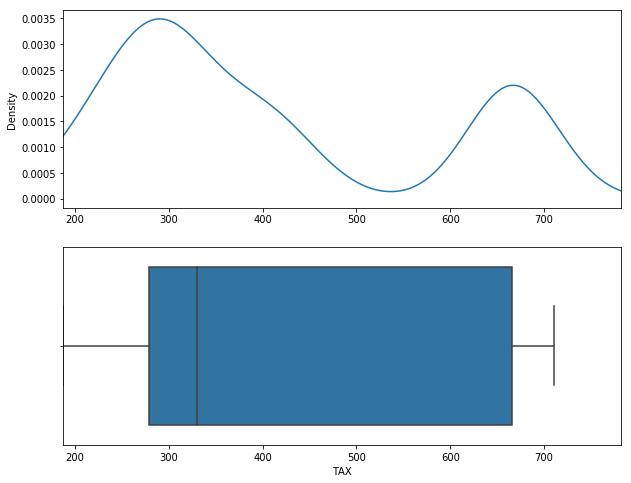

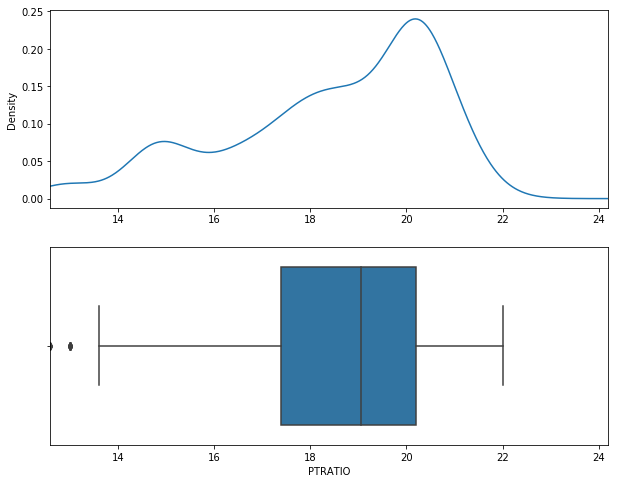

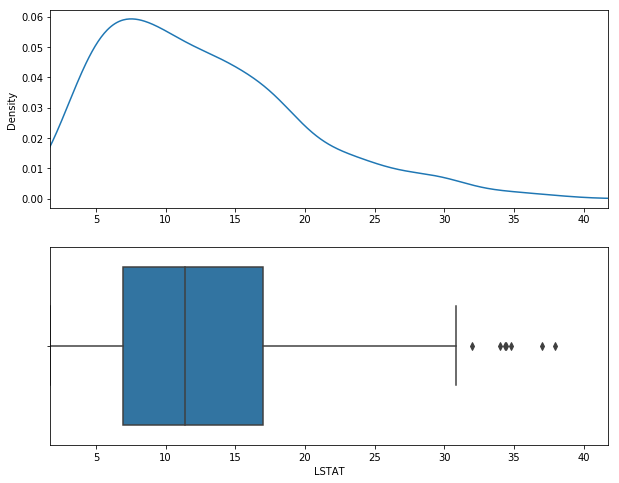

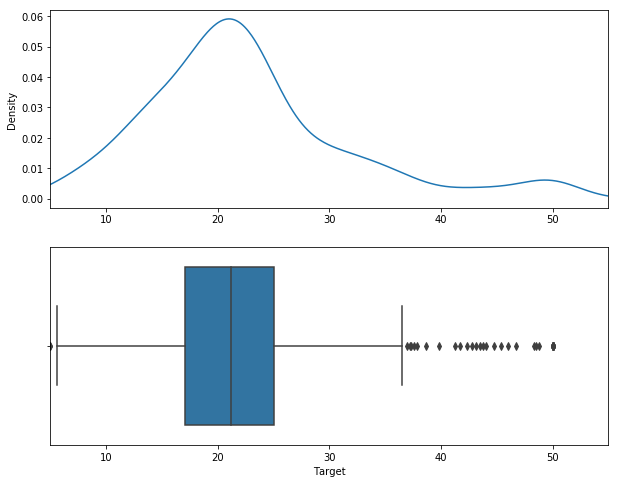

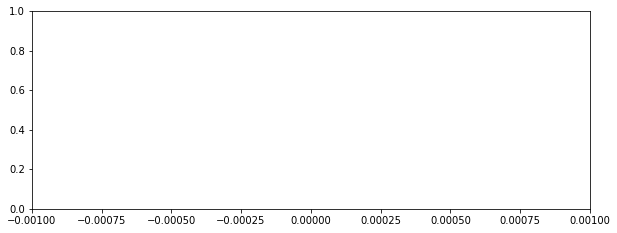

In [5]:
# Perform Exploratory Data Analysis here!

# for key in df.keys():
#     print(boston.feature_names[key])
#     print("min", df[key].min())
#     print("max", df[key].max())
#     print("mean", df[key].mean())
#     print("std", df[key].std())
#     print("---------")
display(df.describe())
df.isnull().values.sum()

newdf = df.drop(["B"], axis=1)
newdf["Outlier"] = 0

display(newdf.head())
i="CRIM"
def density_boxplot(column, newdf):
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    plt.xlim(newdf[column].min(), newdf[column].max()*1.1)

    ax = newdf[column].plot(kind='density')

    plt.subplot(212)
    plt.xlim(newdf[column].min(), newdf[column].max()*1.1)
    sns.boxplot(x=newdf[column])

def density_boxplot_bounds(column, df, minb, maxb):
    i = column
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    plt.axvline(x=minb)
    plt.axvline(x=maxb)

    ax = df[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    sns.boxplot(x=df[i])
    plt.axvline(x=minb)
    plt.axvline(x=maxb)
    
for key in newdf.keys():
    density_boxplot(key, newdf)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


LinAlgError: singular matrix

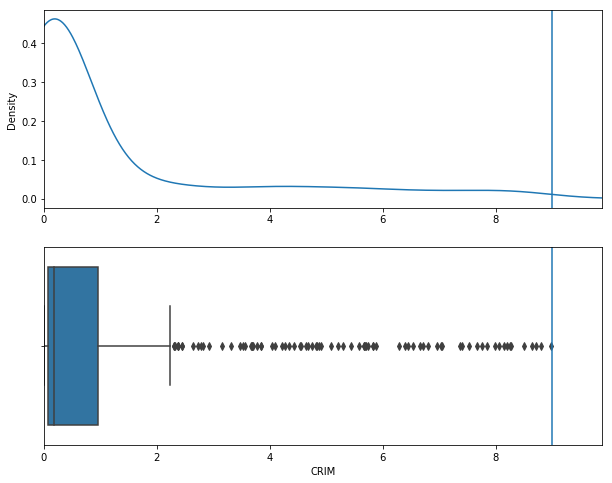

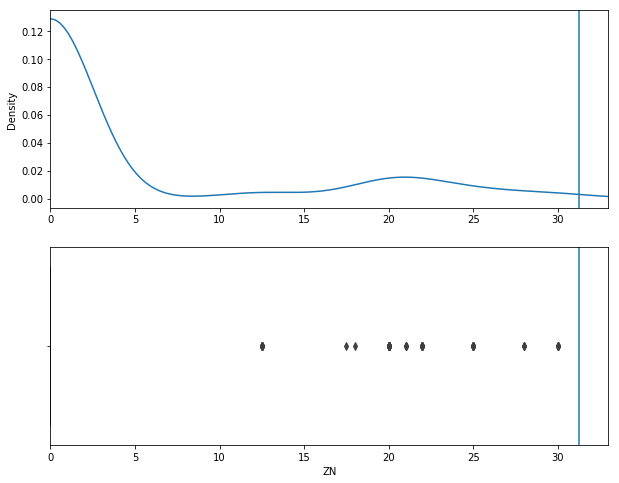

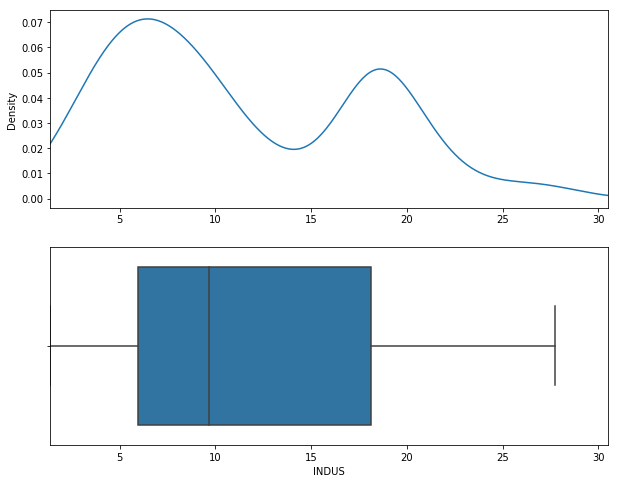

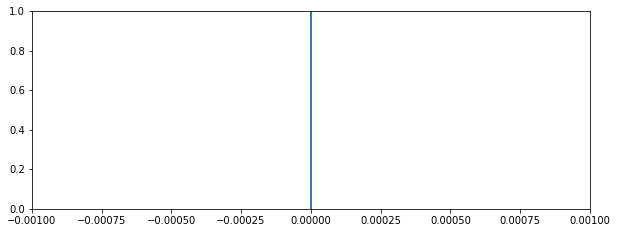

In [7]:

def interquartile_range(column, df):
    #Get interquartile range
    q75, q25 = np.percentile(df[column], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    i = column
    

    df.loc[df[i] < min, 'Outlier'] = 1
    df.loc[df[i] > max, 'Outlier'] = 1
    return (min, max)



for key in newdf.keys():
    min_max = interquartile_range(key, newdf)
    density_boxplot_bounds(key, newdf[newdf["Outlier"] == 0], min_max[0], min_max[1])



In [8]:


outdf = newdf.loc[newdf.Outlier == 0]
display(outdf.describe())
display(len(df))
display(len(outdf))

outdf = outdf.drop(["Outlier"], axis=1)
display(outdf.describe())

target = outdf["Target"]
outdf = outdf.drop(["Target"], axis=1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Target,Outlier
count,342.000000,342.000000,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.0
mean,1.345745,3.913743,11.155877,0.0,0.552651,6.257056,69.741228,3.696131,7.903509,379.614035,18.546491,12.179678,22.509357,0.0
std,2.212658,8.521184,6.638439,0.0,0.104735,0.644647,26.166971,1.748062,7.489938,152.719560,2.126836,5.968612,7.940425,0.0
min,0.006320,0.000000,1.380000,0.0,0.409000,3.561000,2.900000,1.332500,1.000000,188.000000,13.000000,1.730000,7.000000,0.0
25%,0.100270,0.000000,5.860000,0.0,0.473750,5.886000,52.350000,2.317750,4.000000,277.000000,17.500000,7.570000,18.125000,0.0
50%,0.243125,0.000000,8.560000,0.0,0.538000,6.144500,76.950000,3.275900,5.000000,307.000000,19.100000,11.330000,21.050000,0.0
75%,1.230247,0.000000,18.100000,0.0,0.605000,6.473250,92.500000,4.721100,7.000000,432.000000,20.200000,15.827500,24.300000,0.0
max,8.792120,30.000000,27.740000,0.0,0.871000,8.725000,100.000000,9.222900,24.000000,711.000000,21.200000,34.410000,50.000000,0.0


506

342

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Target
count,342.000000,342.000000,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.345745,3.913743,11.155877,0.0,0.552651,6.257056,69.741228,3.696131,7.903509,379.614035,18.546491,12.179678,22.509357
std,2.212658,8.521184,6.638439,0.0,0.104735,0.644647,26.166971,1.748062,7.489938,152.719560,2.126836,5.968612,7.940425
min,0.006320,0.000000,1.380000,0.0,0.409000,3.561000,2.900000,1.332500,1.000000,188.000000,13.000000,1.730000,7.000000
25%,0.100270,0.000000,5.860000,0.0,0.473750,5.886000,52.350000,2.317750,4.000000,277.000000,17.500000,7.570000,18.125000
50%,0.243125,0.000000,8.560000,0.0,0.538000,6.144500,76.950000,3.275900,5.000000,307.000000,19.100000,11.330000,21.050000
75%,1.230247,0.000000,18.100000,0.0,0.605000,6.473250,92.500000,4.721100,7.000000,432.000000,20.200000,15.827500,24.300000
max,8.792120,30.000000,27.740000,0.0,0.871000,8.725000,100.000000,9.222900,24.000000,711.000000,21.200000,34.410000,50.000000


**_Step 3: Create a Correlation Heatmap_**

In this step, we're going to use the `seaborn` package to crete a correlation heatmap, so that we can see how much correlation there is between each predictor variable.  

The code for building a heatmap can seem a bit intimidating, but don't worry--it's nothing you need to memorize.  You'll find great instructions and examples [in this tutorial](http://www.neural.cz/dataset-exploration-boston-house-pricing.html).  You can also look at the [seaborn docs for heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html).  

**Note:** The tutorial uses an older deprecated method that still works, and is likely the easier route here.  In the current version of `seaborn`, you'll find it inside `sns.linearmodels`.  

Your heatmap should look something like this when completed:

<center><img src='img/heatmap.png' height=60% width=60%></center>


<center><h3>How to Interpret a Correlation Heatmap</h3></center>

This graph can look a little overwhelming at first, but it's not as confusing as it seems.  The whole idea of a correlation heatmap is to line up the columns of the dataset into a grid, and make it easily readable to see what correlates with what.  Each combination of columns is represented as a unique cell in the grid.  

You might notice that the diagonal through the center of the grid is our key.  This makes sense, because if we plotted each at the same position on the x-axis and y-axis (for instance, CRIM would be the first column and the first row), then the box that currently says CRIM would be where we see a measure of CRIM's correlation with itself.  Since any variable's correlation with itself will always be 1, this is a nonsense column, this makes it a great place to put the variable names.  

The best way to read a correlation heatmap is to find the variable you're looking for, and realize that the both row and column extending from it all correspond to that variable.  Anything below the diagonal is going to be mirrored across the diagonal as well.  In the example above, 2 cells down from `INDUS` and 2 cells right of `INDUS` are the exact same thing--the correlation between `INDUS` and `NOX`.  Cells below the diagonal represent this information through color, whereas the cells above the diagonal just give us the actual value.  

Create the heatmap, and then use it to determine which variables have the highest correlation with other variables.  This will be important to help you figure out which columns to remove when tuning your regression.  

number of nans in dataset...


0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


INDUS      0.524862
AGE        0.509176
NOX        0.483145
TAX        0.398639
CRIM       0.362734
RAD        0.251276
PTRATIO    0.221475
ZN        -0.245414
DIS       -0.345776
RM        -0.568370
CHAS            NaN
Name: LSTAT, dtype: float64

array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False

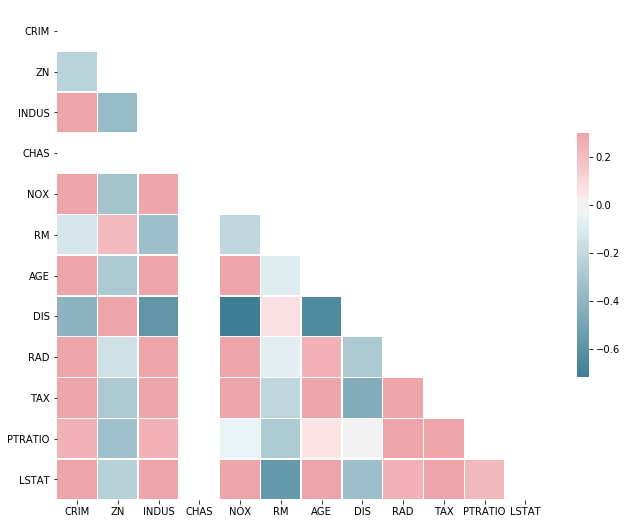

In [9]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("number of nans in dataset...")
display(outdf.isnull().values.sum())
# Create a heatmap using sns.linearmodels.corrplot(), or sns.heatmap().  If you use .heatmap(), you'll need to 
# create a correlation matrix by using np.corrcoef() on your data.  

#The following is heavily influenced by the seaborn documentation
#computer correlation matrix

#multicolinearity and colinearity not desired 
corr = outdf.corr(method="pearson")

corr_with_target = corr.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort_values(ascending=False)
display(predictivity)

#Generate Mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
display(mask)
mask[np.triu_indices_from(mask)] = True

#Set the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<center><h3>Steps 4 - 6: Creating and Tuning your Regression</h3></center>

For the remainder of the notebook, you'll be creating, fitting, and tweaking your Linear Regression.  

**_TASKS_**:

1. Split your data into training and testing sets using train_test_split (alternatively, you can opt to use K-Fold Cross Validation. Either is available in `sklearn`). 
<br>
<br>
2. Use a [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object from SKlearn, and fit it on your training data.  If you run into problems, use the docs and/or Stack Overflow to help!
<br>
<br>
3. Use it to predict for the data in `X_test`, and plot them against the actual values contained in `y_test`.
<br>
<br>
4. Examine your R<sup>2</sup> value.  How much of the variance does your model explain?
<br>
<br>
5. Optional: Tweak your model.  See if you can increase your R<sup>2</sup> by dealing with highly correlated predictors, normalizing your continuous data, etc.  Try whatever data science techniques you've learned so far (or that you can discover on the internet) to make this model more accurate.  

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(outdf, target, test_size=.5)

regr.fit(X_train, y_train)
preds = clf.score(X_test, y_test)
preds

NameError: name 'clf' is not defined